<center>
    <h3> CHƯƠNG 2: CÁC BƯỚC XÂY DỰNG MỘT MÔ HÌNH HỌC MÁY</h3>
    <h4 style='color:red'> Phần 2: Chuẩn bị dữ liệu cho học máy</h4>
 </center>
 
---

**Các bước để xây dựng một mô hình học máy nói chung:**

<img src='pic/preparation.png' width='500px'>

---
Copyright @dangvannam - FIT.HUMG - BKACAD.2023

**XỬ LÝ TẬP DỮ LIỆU DATA_PATIENT.CSV:**
- Tên Dataset: **Data_Patient.csv**
- File dữ liệu chứa thông tin của **300 bệnh nhân trong quá khứ**
<img src='Pic/patient.jpg' width='550px'>

- Mỗi dòng ứng với thông tin của một bệnh nhân, bao gồm 9 thuộc tính:
     - *id: Mã của bệnh nhân (object)*
     - *Age: Tuổi của bệnh nhân (số)*
     - *Gender: Giới tính của bệnh nhân (chuỗi: Male – Female)*
     - *Type: Cho biết loại triệu chứng đau ngực mà bệnh nhân này mắc phải, với 4 giá trị: (Typical angina, Atypical angina, Non-anginal pain, Asymptomatic)*
     - *Blood_pressure: Huyết áp của bệnh nhân – đơn vị: mmhg (số)*
     - *Cholesterol: Chỉ số cholesterol của bệnh nhân – đơn vị: mg/dl (số)*
     - *Heatbeat: Thông số nhịp tim của bệnh nhân – đơn vị: lần/phút (số)*
     - *Thalassemia: Chỉ số Thalassemia của bệnh nhân chỉ gồm 3 giá trị (3: Bình thường | 4: Khiếm khuyết cố định | 7: Kiếm khuyết có thể đảo ngược)*
     - *Result: Cho biết bệnh nhân có bị bệnh tim hay không? (0: Không bị bệnh tim mạch | 1: Bị bệnh tim mạch)*
<img src = 'pic/data.png' width='450px'>

## THỰC HIỆN CHUẨN BỊ DỮ LIỆU CHO HỌC MÁY
---
### 1. Đọc tập dữ liệu

In [1]:
#Đọc tập dữ liệu dataset
import pandas as pd
df_patient = pd.read_csv('Data/Data_Patient.csv',
                        index_col=0)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   Gender          300 non-null    object 
 2   Type            295 non-null    object 
 3   Blood_pressure  300 non-null    int64  
 4   Cholesterol     300 non-null    int64  
 5   Heartbeat       300 non-null    int64  
 6   Thalassemia     293 non-null    float64
 7   Result          300 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 21.1+ KB


In [2]:
#hiển thị 5 dòng dữ liệu đầu tiên
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0


In [3]:
#hiển thị 5 dòng dữ liệu cuối cùng
df_patient.tail()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
Patient_298,45,Male,Typical angina,110,264,132,7.0,1
Patient_299,68,Male,Asymptomatic,144,193,141,7.0,1
Patient_300,57,Male,Asymptomatic,130,131,115,7.0,1


### 2. Quan sát và khám phá tập dữ liệu
---
Thực hiện quan sát các đặc trưng thống kê, các biểu đồ liên quan đến tập dữ liệu để hiểu dữ liệu.

In [4]:
#khám phá tập dữ liệu 
#1. Quan sát Các thuộc tính số
df_patient.describe()

,Age,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
count,300.000000,300.000000,300.000000,300.000000,293.000000,300.00000
mean,54.490000,131.686667,247.070000,149.563333,4.781570,0.46000
std,9.032267,17.682498,51.835136,22.818595,1.944452,0.49923
min,29.000000,94.000000,126.000000,71.000000,3.000000,0.00000
25%,48.000000,120.000000,211.000000,133.750000,3.000000,0.00000
50%,56.000000,130.000000,242.500000,152.500000,3.000000,0.00000
75%,61.000000,140.000000,275.250000,165.250000,7.000000,1.00000
max,77.000000,200.000000,564.000000,202.000000,7.000000,1.00000


In [5]:
#2. Quan sát Các thuộc tính object
df_patient.describe(include='O')

,Gender,Type
count,300,295
unique,2,4
top,Male,Asymptomatic
freq,205,139


In [6]:
#Kiểm tra thuộc tính Gender:
df_patient['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
#Lọc danh sách bệnh nhân có Gender = ['M' or 'F']
df_patient[(df_patient['Gender'] == 'M') |
           (df_patient['Gender'] == 'F') ]

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,


In [8]:
#Thống kê số lượng theo nhóm
df_patient['Gender'].value_counts()
#Chuẩn hóa thống nhất thuộc tính giới --> [Male|Female]

Male      205
Female     95
Name: Gender, dtype: int64

In [9]:
#Phần còn lại giống với ví dụ đã làm trong bài Bác sỹ AI

Male      205
Female     95
Name: Gender, dtype: int64


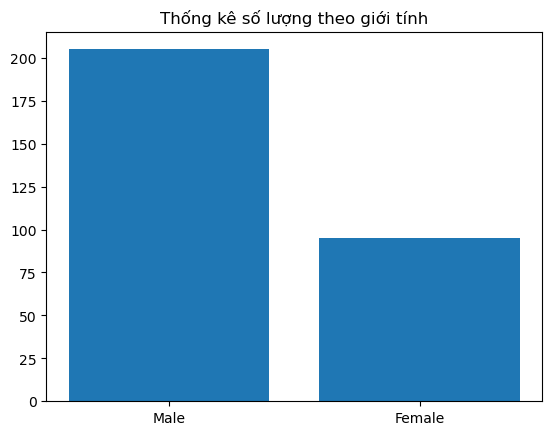

In [10]:
#Thống kê dữ liệu theo giới tính
kq_gender = df_patient['Gender'].value_counts()
print(kq_gender)
#----------------------------------------------
#trực quan hóa kết quả
import matplotlib.pyplot as plt
plt.bar(kq_gender.index,kq_gender.values)
plt.title('Thống kê số lượng theo giới tính')
plt.show()

### 3) Phát hiện và xử lý dữ liệu thiếu trong Dataset
---
Nếu dữ liệu có chứa các giá trị thiếu (null - missing) nó sẽ gây ra vấn đề lớn cho các model học máy. Do đó, quá trình chuẩn bị dữ liệu phải tìm ra các giá trị thiếu trong tập dữ liệu và xử lý chúng. 


In [11]:
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0


In [12]:
#Kiểm tra dữ liệu thiếu trong Dataset
df_patient.isnull().sum()

Age               0
Gender            0
Type              5
Blood_pressure    0
Cholesterol       0
Heartbeat         0
Thalassemia       7
Result            0
dtype: int64

In [13]:
#Các dòng dữ liệu chứa missing của thuộc tính Type
df_patient.loc[df_patient[['Type']].isnull().any(axis=1)]

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_206,58,Male,NaN,128,259,130,7.0,1
Patient_219,59,Male,NaN,138,271,182,3.0,0
Patient_251,58,Male,NaN,146,218,105,7.0,1
Patient_271,66,Male,NaN,160,228,138,6.0,0
Patient_293,63,Male,NaN,140,187,144,7.0,1


In [14]:
#Các dòng dữ liệu chứa missing của thuộc tính Type
df_patient.loc[df_patient[['Thalassemia']].isnull().any(axis=1)]

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
Patient_21,64,Male,Typical angina,110,211,144,NaN,0
Patient_36,42,Male,Asymptomatic,140,226,178,NaN,0
Patient_241,41,Female,Atypical angina,126,306,163,NaN,0
Patient_266,52,Male,Asymptomatic,128,204,156,NaN,1
Patient_278,57,Male,Atypical angina,154,232,164,NaN,1
Patient_294,63,Female,Asymptomatic,124,197,136,NaN,1


**Có 2 thuộc tính chứa giá trị null trong Dataset**

1) Thuộc tính Type: có 5 giá trị missing

2) Thuộc tính Thalassemia: Chứa 7 giá trị missing

---
Có rất nhiều phương pháp xử lý missing, tùy thuộc vào từng loại dữ liệu cụ thể để lựa chọn phương án xử ly phù hợp. Hình dưới đây chỉ ra các phương pháp chính có thể lựa chọn trong việc xử lý giá trị missing.
<img src ='pic/handlingmissing.png' width='400px'>

Với bài 2 thuộc tính này sử dụng phương pháp thay thế giá trị thiếu bằng giá trị xuất hiện nhiều nhất (mode) của thuộc tính đó.

In [15]:
#Thống kê giá trị khác nhau của thuộc tính Type
# để xác định thuộc tính xuất hiện nhiều nhất trong tập dữ liệu
df_patient['Type'].value_counts()

Asymptomatic        139
Non-anginal pain     84
Atypical angina      49
Typical angina       23
Name: Type, dtype: int64

In [16]:
#Thống kê giá trị khác nhau của thuộc tính Thalassemia
#Để xác định thuộc tính xuất hiện nhiều nhất trong tập dữ liệu
df_patient['Thalassemia'].value_counts()

3.0    158
7.0    117
6.0     18
Name: Thalassemia, dtype: int64

**Với Thuộc tính Type:**
Giá trị Asymptomatic xuất hiện nhiều nhất trong tập dữ liệu với 139 lần. Thay thế 5 giá trị thiếu của thuộc tính Type bằng giá trị 'Asymptomatic'.

---
**Với Thuộc tính Thalassemia:**
Giá trị 3 xuất hiện nhiều nhất trong tập dữ liệu với 158 lần. Thay thế 7 vị trí giá trị thiếu của thuộc tính Thalassemia bằng giá trị 3.


In [17]:
#Thực hiện thay thế giá trị thiếu bằng giá trị xuất hiện nhiều nhất (mode)
df_patient['Type'].fillna('Asymptomatic', inplace=True)
df_patient['Thalassemia'].fillna(3.0, inplace=True)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   Gender          300 non-null    object 
 2   Type            300 non-null    object 
 3   Blood_pressure  300 non-null    int64  
 4   Cholesterol     300 non-null    int64  
 5   Heartbeat       300 non-null    int64  
 6   Thalassemia     300 non-null    float64
 7   Result          300 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 21.1+ KB


**Như vậy, sau khi xử lý giá trị thiếu với thuộc tính Type và Thalassemia, tập dữ liệu đã đầy đủ không bị missing giá trị nào.**

### 4) Mã hóa dữ liệu liệu Categorical (Encoding Categorical Data)
---

Các loại dữ liệu trong Dataset:
    - Numerical data: Giá nhà, nhiệt độ, thông số chiều cao, cân nặng, tuổi...(dữ liệu số)
    - Categorical data: tên người, địa chỉ, Yes/No, True/Flase, Male/Female....(dữ liệu chuỗi, boolean)
 
 Các mô hình học máy hoàn toàn làm việc trên các phép toán và xử lý dữ liệu số, nên nếu dữ liệu có chứa thuộc tính có kiểu Categorical sẽ phát sinh các vấn đề. Vì vậy, cần phải mã hóa các dữ liệu này thành dữ liệu số.
 
<img src='pic/encoding.png' width='400px'>

In [18]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   Gender          300 non-null    object 
 2   Type            300 non-null    object 
 3   Blood_pressure  300 non-null    int64  
 4   Cholesterol     300 non-null    int64  
 5   Heartbeat       300 non-null    int64  
 6   Thalassemia     300 non-null    float64
 7   Result          300 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 21.1+ KB


In [19]:
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,3.0,0


In [20]:
#Liệt kê các giá trị của thuộc tính Gender |Type
print('1. Thuộc tính Gender:', df_patient['Gender'].unique())
print('2. Thuộc tính Type:', df_patient['Type'].unique())

1. Thuộc tính Gender: ['Male' 'Female']
2. Thuộc tính Type: ['Typical angina' 'Asymptomatic' 'Non-anginal pain' 'Atypical angina']


In [21]:
#Trong tập dữ liệu có 2 thuộc tính: Gender và Type có kiểu dữ liệu Categorical
#Thực hiện chuyển đổi cho 2 thuộc tính này
convert_gender = {'Male':0,'Female':1}

convert_type = {'Typical angina': 1,
                'Asymptomatic':2,
                'Non-anginal pain':3,
                'Atypical angina':4}

df_patient['Gender']=df_patient['Gender'].map(convert_gender).astype(int)
df_patient['Type']=df_patient['Type'].map(convert_type).astype(int)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   Gender          300 non-null    int32  
 2   Type            300 non-null    int32  
 3   Blood_pressure  300 non-null    int64  
 4   Cholesterol     300 non-null    int64  
 5   Heartbeat       300 non-null    int64  
 6   Thalassemia     300 non-null    float64
 7   Result          300 non-null    int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 18.8+ KB


In [22]:
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,0,1,145,233,150,6.0,0
Patient_02,67,0,2,160,286,108,3.0,1
Patient_03,67,0,2,120,229,129,7.0,1
Patient_04,37,0,3,130,250,187,3.0,0
Patient_05,41,1,4,130,204,172,3.0,0


**Sau khi xử lý các thuộc tính của tập dữ liệu chỉ còn lại dữ liệu số**

### 5. Kiểm tra mức độ cân bằng của dữ liệu
---

0    162
1    138
Name: Result, dtype: int64


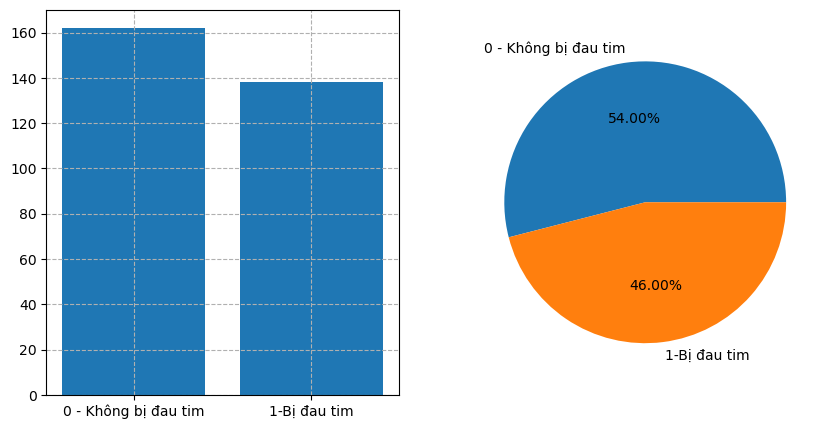

In [23]:
#Thống kê số lượng bệnh nhân bị bệnh và không bị bệnh đau tim
kq = df_patient['Result'].value_counts()
print(kq)
#----------------------------------------------
#Trực quan hóa kết quả:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(['0 - Không bị đau tim','1-Bị đau tim'],kq.values)
plt.grid(ls='--')

plt.subplot(1,2,2)
plt.pie(kq.values, labels=['0 - Không bị đau tim','1-Bị đau tim'],
       autopct='%.2f%%')
plt.show()

### 6. Lưu dữ liệu sau khi đã xử lý
---

In [25]:
#Lưu ra file .CSV, Excel...
df_patient


,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,0,1,145,233,150,6.0,0
Patient_02,67,0,2,160,286,108,3.0,1
Patient_03,67,0,2,120,229,129,7.0,1
Patient_04,37,0,3,130,250,187,3.0,0
Patient_05,41,1,4,130,204,172,3.0,0
...,...,...,...,...,...,...,...,...
Patient_296,59,0,2,164,176,90,6.0,1
Patient_297,57,1,2,140,241,123,7.0,1
Patient_298,45,0,1,110,264,132,7.0,1


In [26]:
# Lưu dạng file dạng csv
df_patient.to_csv('Data_patient_OK.csv',
                 index=None)# không lư cột chỉ số

In [27]:
# lưu ra file excel
df_patient.to_excel('Data_patient_OK.xlsx',
                   index=None)

## Làm việc với tập dữ liệu data patient mới

In [28]:
# Đọc tập dữ liêu mới
df_new = pd.read_csv('Data/Data_Patient_New.csv')
df_new

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
0,Patient_01,63,Male,Typical angina,145,233,150,6.0,0
1,Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
2,Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
3,Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
4,Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
...,...,...,...,...,...,...,...,...,...
296,Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
297,Patient_298,45,Male,Typical angina,110,264,132,7.0,1
298,Patient_299,57,Male,Asymptomatic,130,131,115,7.0,1
299,Patient_300,57,Male,Asymptomatic,130,131,115,7.0,1


In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              301 non-null    object 
 1   Age             301 non-null    int64  
 2   Gender          301 non-null    object 
 3   Type            296 non-null    object 
 4   Blood_pressure  301 non-null    int64  
 5   Cholesterol     301 non-null    int64  
 6   Heartbeat       301 non-null    int64  
 7   Thalassemia     294 non-null    float64
 8   Result          301 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 21.3+ KB


In [30]:
# quan sát đặc trưng thống kê
df_new.describe()

,Age,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
count,301.000000,301.000000,301.000000,301.000000,294.000000,301.000000
mean,56.578073,131.641196,247.179402,149.531561,4.775510,0.458472
std,38.829774,17.638901,52.374749,22.882085,1.943909,0.499102
min,29.000000,94.000000,126.000000,71.000000,3.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,3.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,3.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,7.000000,1.000000
max,710.000000,200.000000,564.000000,202.000000,7.000000,1.000000


In [32]:
# kiểm tra bệnh nhân có sự bất thường về tuổi
df_new[df_new['Age']>=150]

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
42,Patient_43,710,Female,Atypical angina,160,302,162,3.0,0


In [ ]:
# xử lý bệnh nhân số 43 (dữ liệu ngoại lai về tuổi)


In [ ]:
# kiểm tra và xử lý dữ liệu cps Cholesterol => 500

In [33]:
df_new.describe(include='O')

,id,Gender,Type
count,301,301,296
unique,300,4,4
top,Patient_291,Male,Asymptomatic
freq,2,204,139


In [35]:
# kiểm tra thuộc tính gender
df_new['Gender'].value_counts()

Male      204
Female     95
M           1
F           1
Name: Gender, dtype: int64

In [44]:
# lọc bệnh nhân có giới tính là M và F
df_new.[df_new['Gender'] == 'M']


SyntaxError: invalid syntax (1436395290.py, line 2)

In [ ]:
# sinh viên đề xuất cách làm giới tính missing

In [45]:
# kiểm tra dữ liệu trùng lặp
df_new.duplicated().sum()

1

In [46]:
# hiển thị bản ghi lặp lại
df_new.loc[df_new.duplicated() == True]

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
300,Patient_291,55,Female,Atypical angina,132,342,166,3.0,0


In [49]:
# có 01 bản ghi bị lặp lại --> xử lý bằng cách giữ lại bản ghi đầu tiền và xóa đi tất cả các bản ghi phía sau
df_new.drop_duplicates(keep='first',
                       inplace=True)

In [52]:
df_new.tail(12)

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
288,Patient_289,56,Male,Atypical angina,120,240,169,3.0,0
289,Patient_290,67,Male,Non-anginal pain,152,212,150,7.0,1
290,Patient_291,55,Female,Atypical angina,132,342,166,3.0,0
291,Patient_292,44,Male,Asymptomatic,120,169,144,6.0,1
292,Patient_293,63,Male,NaN,140,187,144,7.0,1
293,Patient_294,63,Female,Asymptomatic,124,197,136,NaN,1
294,Patient_295,41,Male,Atypical angina,120,157,182,3.0,0
295,Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
296,Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
297,Patient_298,45,Male,Typical angina,110,264,132,7.0,1


In [54]:
# phát hiện và xử lý missing
df_new.isnull().sum()

id                0
Age               0
Gender            0
Type              5
Blood_pressure    0
Cholesterol       0
Heartbeat         0
Thalassemia       7
Result            0
dtype: int64

In [ ]:
# 1. chuyển đổi dữ liệu về dạng số
# 2. kiểm tra cân bằng
# 3. Lưu kết quả sau khi xử lý
# note: Cần kiểm tra missing, kiểm tra tính trùng lặp, và dữ liệu ngoại lai. Chuẩn hóa dạng số, kiểm tra tính cân bằng,...